In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("/kaggle/input/njjjjjj/scrapper_negative16_03.csv")
df.head(500)

,Unnamed: 0,Review Rating,Review Comment
0,0,4,build quality are superb.. sound very ...
1,1,4,Good
2,2,1,Very bad
3,3,5,Good 👍😊
4,4,1,Bluetooth connect iseu
...,...,...,...
495,495,5,Wow
496,496,4,COOL AND OWSOME PRODUCT I LOVE IT
497,497,5,Powerful product sound quality is Very good an...
498,498,4,Value for money


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77088 entries, 0 to 77087
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      77088 non-null  int64 
 1   Review Rating   77088 non-null  int64 
 2   Review Comment  77088 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [4]:
df = df.rename(columns={"Review Rating":"score"})
df = df.rename(columns={"Review Comment":"Comment"})

In [5]:
df.score.unique()

array([4, 1, 5, 3, 2])

In [6]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2
df['sentiment'] = df.score.apply(to_sentiment)

In [7]:
df['sentiment'].unique()

array([2, 0, 1])

In [8]:
class_names = ['negative', 'neutral', 'positive']


In [9]:
X=df.drop(['sentiment'],axis=1)
y=df['sentiment']

In [10]:
sentiments_count=y.value_counts()
sentiments_count

sentiment
2    58464
0    13104
1     5520
Name: count, dtype: int64

In [11]:
sentiments_count.index

Index([2, 0, 1], dtype='int64', name='sentiment')

In [12]:
minority_class_len=len(df[df['sentiment'] ==1])
print(minority_class_len)


5520


In [13]:
minority_class_indices = df[df['sentiment'] == 1].index
print(minority_class_indices)

Index([   29,    37,    62,    78,    93,   133,   198,   230,   248,   255,
       ...
       77018, 77022, 77027, 77032, 77035, 77044, 77051, 77053, 77073, 77086],
      dtype='int64', length=5520)


In [14]:
majority_class_indices=df[df['sentiment'] == 2].index
print(majority_class_indices)

Index([    0,     1,     3,     5,     6,     7,     8,     9,    10,    11,
       ...
       77071, 77072, 77074, 77075, 77077, 77078, 77079, 77080, 77083, 77087],
      dtype='int64', length=58464)


In [15]:
majority_class_indices2=df[df['sentiment'] == 0].index
print(majority_class_indices2)

Index([    2,     4,    13,    14,    26,    35,    36,    48,    50,    63,
       ...
       77061, 77063, 77064, 77065, 77067, 77076, 77081, 77082, 77084, 77085],
      dtype='int64', length=13104)


In [16]:
rng = np.random.default_rng()

In [17]:
r1=rng.choice(majority_class_indices,minority_class_len,replace=False)
len(r1)

5520

In [18]:
r2=rng.choice(majority_class_indices2,minority_class_len,replace=False)
r2
len(r2)

5520

In [19]:
under_sample_indices = np.concatenate([r1,r2,minority_class_indices])

In [20]:
under_sample = df.loc[under_sample_indices]
df_new=under_sample
df_new

,Unnamed: 0,score,Comment,sentiment
24074,24074,4,Nice product,2
62972,62972,5,Mind blowing👌👌 thanku flipcart.,2
6846,6846,4,Very good quality product thanx flipkart❤️,2
53509,53509,5,I don't know why it has low ratings much much ...,2
69079,69079,5,Thanks.I love it,2
...,...,...,...,...
77044,77044,3,Not bad,1
77051,77051,3,Normal,1
77053,77053,3,Everything is OK but the size of ear buds is v...,1
77073,77073,3,Simply good but big in size,1


<Axes: xlabel='score', ylabel='count'>

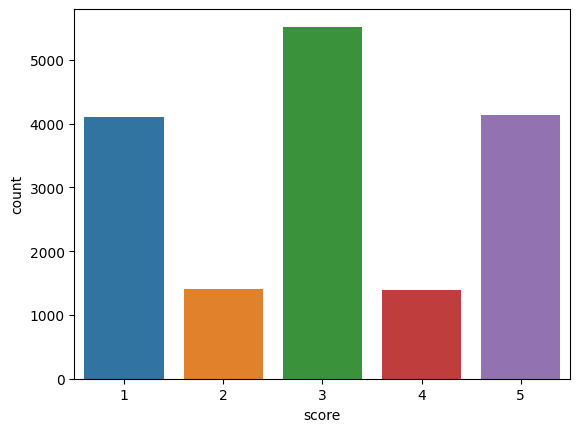

In [21]:
sns.countplot(x='score', data=under_sample)

In [22]:
k=df_new['score']
sentiments_count1=k.value_counts()
sentiments_count1

score
3    5520
5    4136
1    4107
2    1413
4    1384
Name: count, dtype: int64

In [23]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2
df_new['sentiment'] = df.score.apply(to_sentiment)

In [24]:
class_names = ['negative', 'neutral', 'positive']

In [25]:
sample_size = int(len(df_new)*1)
sampleDf = df_new.sample(sample_size, random_state=23)
x = sampleDf.Comment.values
y = sampleDf.score.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [26]:


import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  # Ensure DataLoader is imported

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [27]:
sampleDf.head()



,Unnamed: 0,score,Comment,sentiment
5863,5863,3,Just ok.,1
71902,71902,5,Good,2
62837,62837,4,Very good,2
23161,23161,3,Good delivery and good product..,1
45361,45361,1,Don't buy it,0


In [28]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [29]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-uncased", torch_dtype=torch.float16, attn_implementation="sdpa")
...

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Ellipsis

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [30]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

In [31]:
from transformers import BertTokenizer
import torch

In [32]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [33]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188, 2005, 1016, 3134, 1012]


In [34]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [35]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [36]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [37]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [86]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=160,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [87]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

160


tensor([ 101, 2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188,
        2005, 1016, 3134, 1012,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

In [88]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

160


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [90]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'when',
 'was',
 'i',
 'last',
 'outside',
 '?',
 'i',
 'am',
 'stuck',
 'at',
 'home',
 'for',
 '2',
 'weeks',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 

In [91]:
token_lens = []

for txt in sampleDf.Comment:
  tokens = tokenizer.encode(txt, max_length=160)
  token_lens.append(len(tokens))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


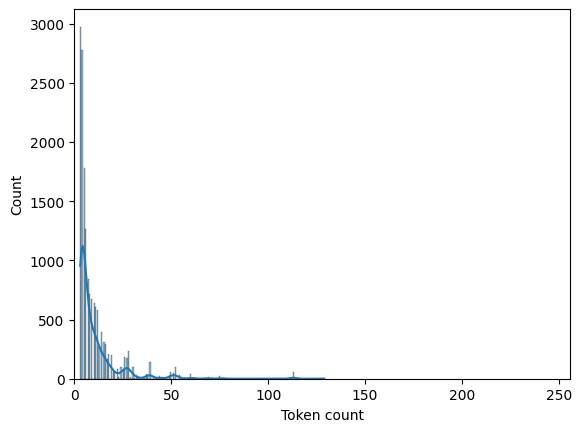

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(token_lens, kde=True)
plt.xlim([0, 256])
plt.xlabel('Token count')
plt.show()

In [93]:
MAX_LEN = 160

In [94]:
class GPReviewDataset(sampleDf):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [95]:
RANDOM_SEED=42
df_train, df_test = train_test_split(sampleDf, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [96]:
df_train.shape, df_val.shape, df_test.shape

((14904, 4), (828, 4), (828, 4))

In [97]:

def create_data_loader(sampleDf, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=sampleDf.Comment.to_numpy(),
    targets=sampleDf.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )


In [98]:
reviews=sampleDf.Comment.to_numpy(),
targets=sampleDf.sentiment.to_numpy(),
reviews

(array(['Just ok.', 'Good', 'Very good', ..., 'Average',
        'Bass quality is 2/10                                Very poor bass quality',
        'Very bad product'], dtype=object),)

In [99]:
from torch.utils.data import DataLoader, Dataset

In [100]:
from torch.utils.data import DataLoader, Dataset

class GPReviewDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

def create_data_loader(sampleDf, tokenizer, max_len, batch_size):
    dataset = GPReviewDataset(
        reviews=sampleDf.Comment.to_numpy(),
        targets=sampleDf.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=4
    )


In [101]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [102]:
!pip install transformers

In [126]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [127]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [128]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [129]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

In [130]:
bert_model.config.hidden_size

768

In [131]:
import torch.nn.functional as F
import torch

# Assuming input_ids and attention_mask are defined and are PyTorch tensors
# Move inputs to the same device as the model
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

# Get the model output
outputs = model(input_ids, attention_mask)

# Apply softmax to the model's output
probabilities = F.softmax(outputs, dim=1)

# If you want to see the probabilities
print(probabilities)


tensor([[0.9583, 0.0361, 0.0055]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [132]:
import torch
import torch.nn as nn
from transformers import BertModel

class SentimentClassifier(nn.Module):
    def __init__(self, n_classes, PRE_TRAINED_MODEL_NAME):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # Correctly extract pooler_output
        pooled_output = self.drop(pooled_output)
        return self.out(pooled_output)


PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'  # Example pre-trained BERT model
n_classes = 3  # Example number of classes (positive, negative, neutral)


model = SentimentClassifier(n_classes=n_classes, PRE_TRAINED_MODEL_NAME=PRE_TRAINED_MODEL_NAME)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


input_ids = torch.tensor([[101, 2054, 2003, 1996, 2803, 102]])  
attention_mask = torch.tensor([[1, 1, 1, 1, 1, 1]]) 


input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)


outputs = model(input_ids, attention_mask)


probabilities = F.softmax(outputs, dim=1)


print(probabilities)


tensor([[0.2520, 0.3438, 0.4042]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [150]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[9.9667e-01, 2.4984e-03, 8.3158e-04]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [151]:
from transformers import BertModel, get_linear_schedule_with_warmup
EPOCHS = 8

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps,
    
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [152]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [153]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [154]:
%%time
from collections import defaultdict
import time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/8
----------
Train loss 0.1773020192454774 accuracy 0.9236446591519055
Val   loss 0.10150148746694097 accuracy 0.9541062801932366

Epoch 2/8
----------
Train loss 0.12816738658672716 accuracy 0.9415593129361245
Val   loss 0.10870036981493915 accuracy 0.9504830917874396

Epoch 3/8
----------
Train loss 0.12004953445934155 accuracy 0.9430354267310789
Val   loss 0.09987287587808588 accuracy 0.9541062801932366

Epoch 4/8
----------
Train loss 0.11818403018841907 accuracy 0.9434380032206119
Val   loss 0.1003100656108962 accuracy 0.9541062801932366

Epoch 5/8
----------
Train loss 0.11455780727087567 accuracy 0.9455179817498658
Val   loss 0.1002748687706816 accuracy 0.9541062801932366

Epoch 6/8
----------
Train loss 0.11428410001370787 accuracy 0.9444444444444444
Val   loss 0.10043208578980949 accuracy 0.9541062801932366

Epoch 7/8
----------
Train loss 0.11337849350171234 accuracy 0.9447799248523886
Val   loss 0.10077837014292666 accuracy 0.9541062801932366

Epoch 8/8
----------
Tr

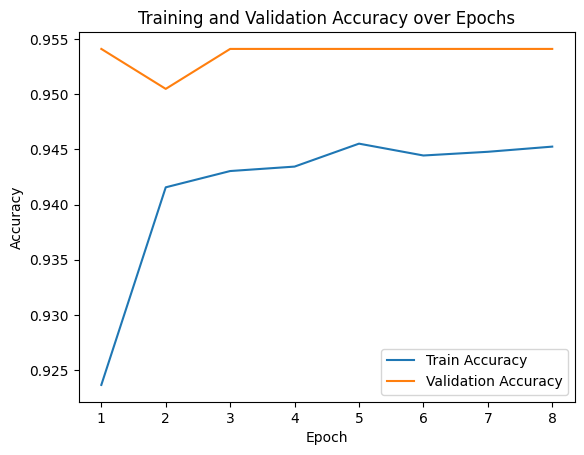

In [158]:
train_acc = [
    0.9236446591519055, 0.9415593129361245, 0.9430354267310789, 
    0.9434380032206119, 0.9455179817498658, 0.9444444444444444, 
    0.9447799248523886, 0.9452495974235104
]

val_acc = [
    0.9541062801932366, 0.9504830917874396, 0.9541062801932366, 
    0.9541062801932366, 0.9541062801932366, 0.9541062801932366, 
    0.9541062801932366, 0.9541062801932366
]

epochs = range(1, 9)  # 8 epochs

import matplotlib.pyplot as plt

plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.show()


In [159]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9528985507246376

In [140]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [160]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [161]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       1.00      0.98      0.99       258
     neutral       0.91      0.94      0.93       266
    positive       0.95      0.93      0.94       304

    accuracy                           0.95       828
   macro avg       0.95      0.95      0.95       828
weighted avg       0.95      0.95      0.95       828



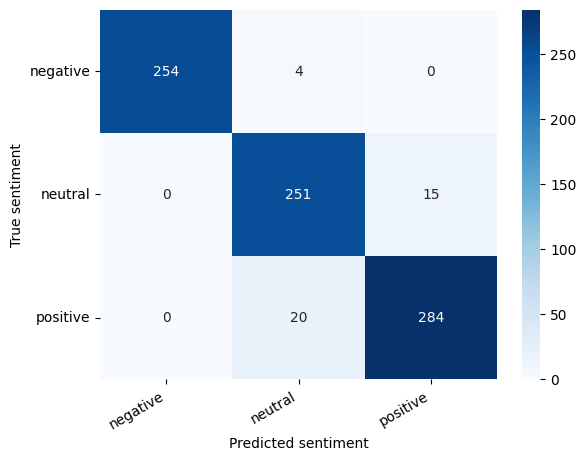

In [162]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [163]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [181]:

def predict_sentiment(model, tokenizer, comment_list, device='cpu'):
    class_names = ['negative', 'neutral', 'positive']  
    MAX_LEN = 160  
    for comment in comment_list:
        encoded_review = tokenizer.encode_plus(
            comment,
            max_length=MAX_LEN,
            add_special_tokens=True,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )


        input_ids = encoded_review['input_ids'].to(device)
        attention_mask = encoded_review['attention_mask'].to(device)

        with torch.no_grad():
            output = model(input_ids, attention_mask)
            _, prediction = torch.max(output, dim=1)

        print(f'Review text: {comment}')
        print(f'Sentiment  : {class_names[prediction]}')
        print()  


comments = [
    "The TV disappointed with its inconsistent picture quality.",
    "The sound reproduction was adequate but not exceptional.",
    "The TV offers standard features not that much good but okay ",
    "I experienced frequent connectivity issues with this TV.",
    "Overall, it's a decent TV for the price point."
]

predict_sentiment(model, tokenizer, comments, device='cuda') 

Review text: The TV disappointed with its inconsistent picture quality.
Sentiment  : negative

Review text: The sound reproduction was adequate but not exceptional.
Sentiment  : positive

Review text: The TV offers standard features not that much good but okay 
Sentiment  : neutral

Review text: I experienced frequent connectivity issues with this TV.
Sentiment  : negative

Review text: Overall, it's a decent TV for the price point.
Sentiment  : positive

